<a href="https://colab.research.google.com/github/Rekt77/kisa_insuretech/blob/master/python_prob_day3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DAY 3
------
### PROB 1
 - TED데이터에서 speaker별 누적조회수 순위와 동영상 조회수 순위를 도표화 하여라(10위 까지)
 - 누적조회수 -> speaker가 참가한 모든강연의 조회수를 누적, 그래프 라벨은 스피커 이름 앞글자 3개
 - 최고인기동영상 -> views를 기준으로 10위까지 추출, 그래프 라벨은 스피커 이름 앞글자 3개

### PROB 2
 - 보험데이터에서 주소별 직업군 도표를 작성하여라(히트맵) -> 중복제거 요함

# ANSWER 1

<BarContainer object of 10 artists>

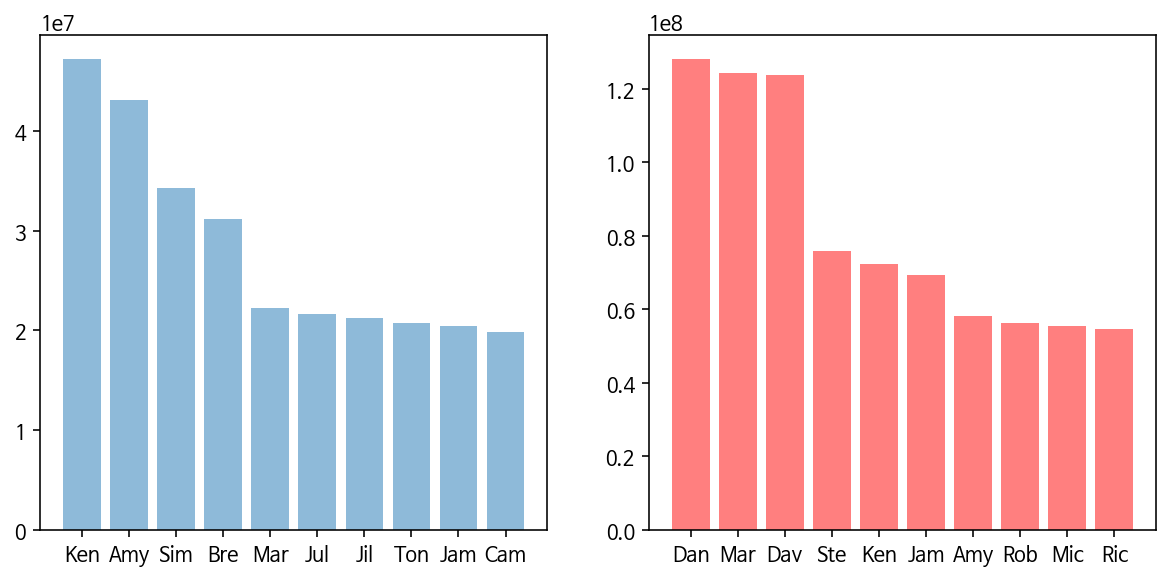

In [16]:
df = pd.read_csv("/content/drive/My Drive/insuretech/TED/ted_main.csv")
new_df = df["main_speaker"].apply(lambda x : x[:3])
df["abr"] = new_df
df = df.sort_values("views",ascending=False)
plt.figure(figsize=(10,10))
summ = df.groupby("abr").sum()["views"].sort_values(ascending=False) 
ax1 = plt.subplot(221)
ax1.bar(df['abr'].head(10),df['views'].head(10),alpha=0.5)
ax2 = plt.subplot(222)
ax2.bar(list(summ.index)[:10],summ.head(10),alpha=0.5, color="r")

# ANSWER 2

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pandas.io.json import json_normalize
from wordcloud import WordCloud, STOPWORDS

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 59 not upgraded.


In [3]:
df = pd.read_excel("/content/drive/My Drive/insuretech/insurance/kisa_insurance.xlsx")

In [4]:
new_columns = ['c_idx','s_idx','sex','age','occupation','middle_div','small_div','sub_div','city','district','ins_cat','ins_name','gar_name','long_gar_cat','sp_term']
df.columns = new_columns
df.head()

,c_idx,s_idx,sex,age,occupation,middle_div,small_div,sub_div,city,district,ins_cat,ins_name,gar_name,long_gar_cat,sp_term
0,2,26394,여자,21,"주부, 학생 및 기타 비경제활동인구","고등학생 및 주부, 무직",고등학생,고등학생,서울,노원구,장기/운전자,무배당 프로미라이프 참좋은운전자+보험1908,상해,상해후유장해,교통상해50%이상후유장해(1회한)
1,2,26394,여자,21,"주부, 학생 및 기타 비경제활동인구","고등학생 및 주부, 무직",고등학생,고등학생,서울,노원구,장기/운전자,무배당 프로미라이프 참좋은운전자+보험1908,기타/인,비용기타,행정소송법률비용손해(실손)
2,2,26394,여자,21,"주부, 학생 및 기타 비경제활동인구","고등학생 및 주부, 무직",고등학생,고등학생,서울,노원구,장기/운전자,무배당 프로미라이프 참좋은운전자+보험1908,상해,상해사망·후유장해,상해사망
3,2,26394,여자,21,"주부, 학생 및 기타 비경제활동인구","고등학생 및 주부, 무직",고등학생,고등학생,서울,노원구,장기/운전자,무배당 프로미라이프 참좋은운전자+보험1908,상해,상해사망·후유장해,교통상해사망
4,2,26394,여자,21,"주부, 학생 및 기타 비경제활동인구","고등학생 및 주부, 무직",고등학생,고등학생,서울,노원구,장기/운전자,무배당 프로미라이프 참좋은운전자+보험1908,기타/인,비용기타,법률비용손해(실손)


In [12]:
pop_col = ["c_idx","s_idx","sex","age","occupation","district","ins_cat","ins_name","gar_name"]
pop_df = df[pop_col]

# 증권 번호를 불러와서 중복된 것들을 전부제거
# 각 데이터당 1개의 고유값만 남음
sidxs = df["s_idx"].drop_duplicates()

# 중복되지 않은 증권번호를 이터레이팅
for sidx in sidxs:
  # row중에 sidx와 s_idx가 같은것을 고르고 그중에 gar_name에,
  # df["s_idx"]==sidx 마스크를 만족하는 row가 몇개인지 카운팅하여 삽입
  pop_df.loc[df["s_idx"]==sidx,"gar_name"] = int(len(pop_df[pop_df["s_idx"]==sidx]))

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [6]:
# 중복된 행을 전부제거하고 고유 행만 남김
pop_df = pop_df.drop_duplicates()
pop_df.head()

,c_idx,s_idx,sex,age,occupation,district,ins_cat,ins_name,gar_name
0,2,26394,여자,21,"주부, 학생 및 기타 비경제활동인구",노원구,장기/운전자,무배당 프로미라이프 참좋은운전자+보험1908,6
6,4,20024,남자,21,"주부, 학생 및 기타 비경제활동인구",도봉구,장기/질병,무배당 프로미라이프 참좋은치아사랑보험1904,7
13,8,27841,남자,21,"주부, 학생 및 기타 비경제활동인구",동대문구,장기/질병,무배당 프로미라이프 참좋은행복플러스+종합보험1911,24
37,15,16512,남자,20,"주부, 학생 및 기타 비경제활동인구",금천구,장기/운전자,무배당 프로미라이프 참좋은운전자+보험1908,10
47,21,27840,여자,18,"주부, 학생 및 기타 비경제활동인구",동대문구,장기/상해,무배당 프로미라이프 아이(I)러브(LOVE)건강보험2001,23


In [7]:
ctab = pd.crosstab(pop_df["district"],pop_df["occupation"])

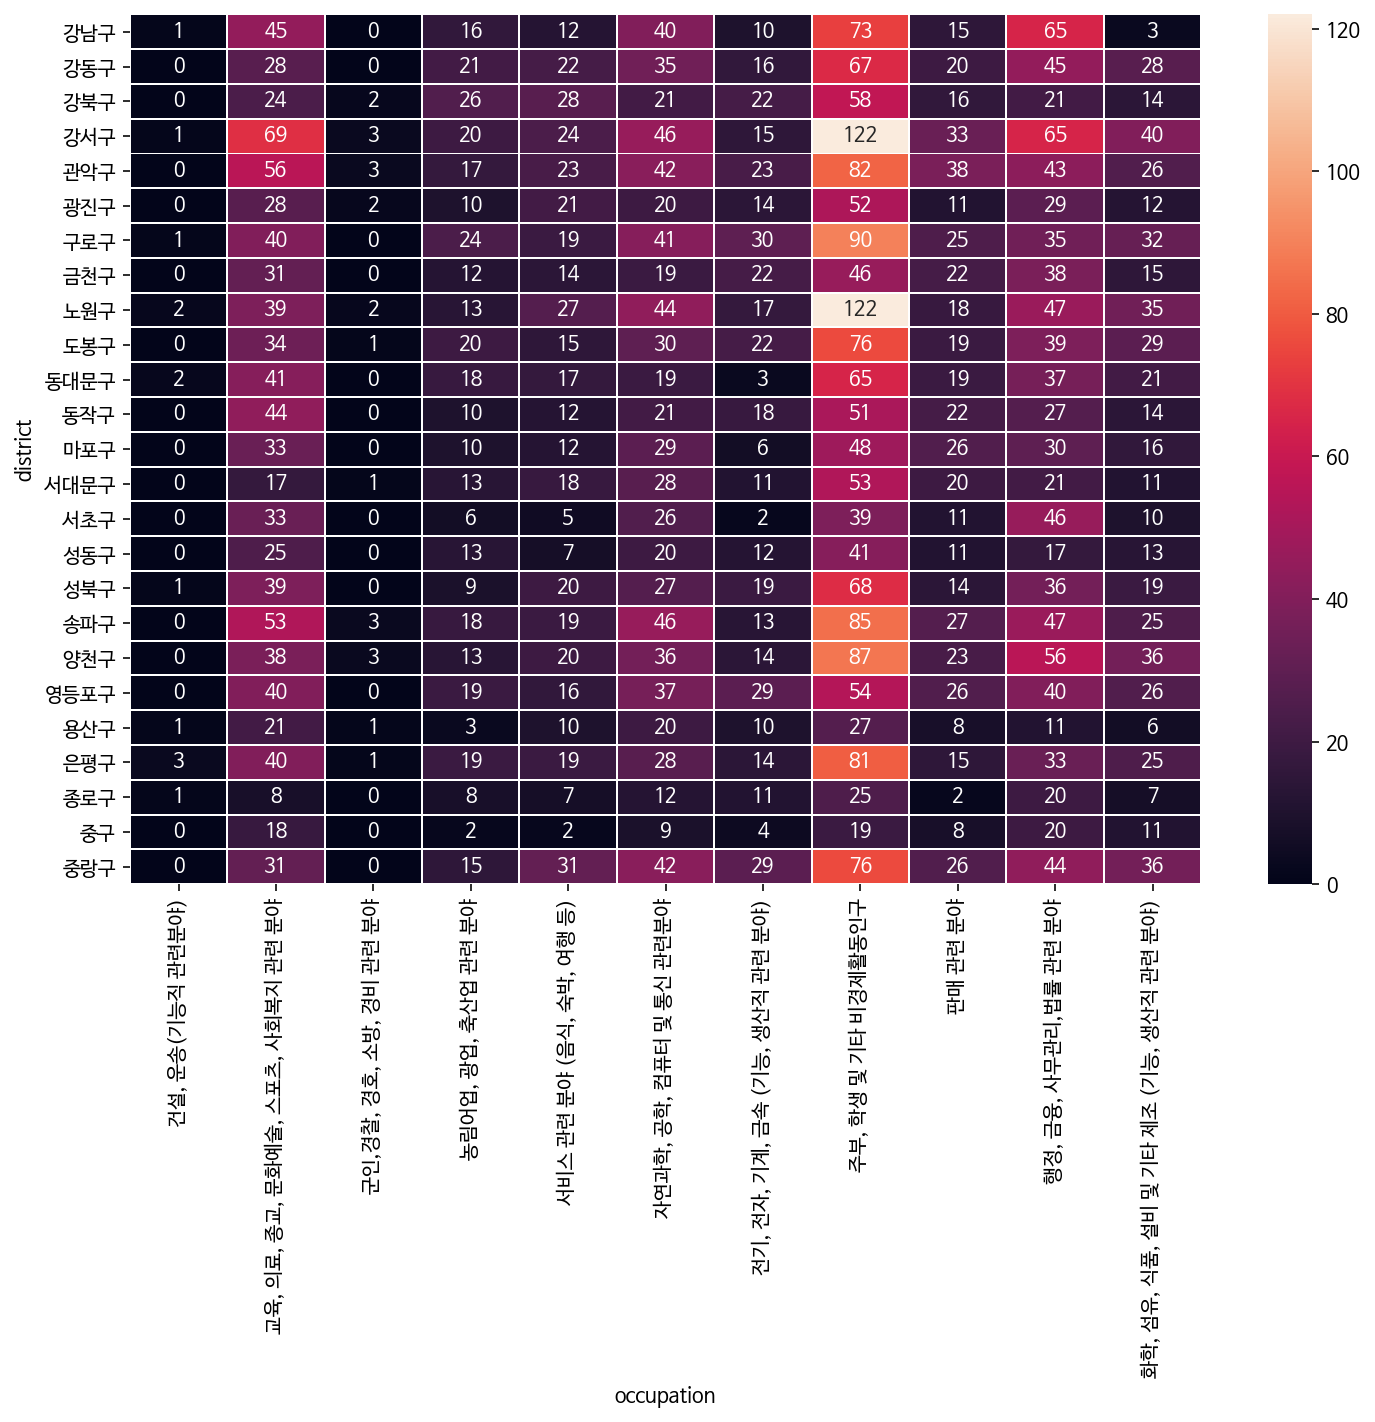

In [10]:
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(ctab, annot=True, linewidths=.5, ax=ax, fmt='n')